<a href="https://colab.research.google.com/github/KxxHyoRim/Data-Mining/blob/main/AirRoute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

## 구글 드라이브 사용 권한 부여

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 구글 드라이브에서 csv 파일 로드

In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/Data Mining/항공통계.csv'

#pandas read_csv로 불러오기
data = pd.read_csv(filename, encoding='cp949') # encoding : 한글 로딩 위함
data.head()

,항공노선,LEVEL1,값,년(Annual),증감,증감율,구성비,누계,누계구성비
0,김포-김해,계,273,2020,273,273,0,0,0
1,김포-김해,대한항공,63,2020,63,63,0,0,0
2,김포-김해,아시아나항공,0,2020,0,0,0,0,0
3,김포-김해,제주항공,43,2020,43,43,0,0,0
4,김포-김해,진에어,56,2020,56,56,0,0,0


## 내륙라인 값 추출

In [ ]:
is_inline = data['항공노선'] == '내륙소계'  # '항공노선' column의 값이 '내륙소계'인가
is_inline_sum = data['LEVEL1'] == '계'      # 'LEVEL1' column의 값이 '계'인가

inline = data[is_inline & is_inline_sum]    # 두 조건을 만족하는 행
inline.head()

,항공노선,LEVEL1,값,년(Annual),증감,증감율,구성비,누계,누계구성비
130,내륙소계,계,489,2020,489,489,0,0,0


## 제주라인 값 추출

In [ ]:
is_jeju = data['항공노선'] == '제주소계'  # '항공노선' column의 값이 '제주소계'인가
is_jeju_sum = data['LEVEL1'] == '계'      # 'LEVEL1' column의 값이 '계'인가

jeju = data[is_jeju & is_jeju_sum]        # 두 조건을 만족하는 행 추출
jeju.head()

,항공노선,LEVEL1,값,년(Annual),증감,증감율,구성비,누계,누계구성비
280,제주소계,계,1592,2020,1592,1592,0,0,0


내륙라인 489
제주라인 1592


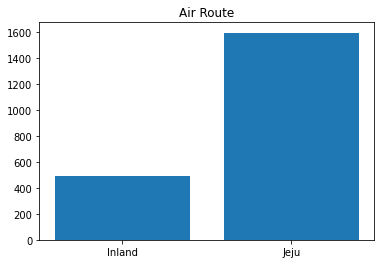

In [ ]:
inline_val = inline['값'].reset_index(drop = True)[0]
print("내륙라인", inline_val)

jeju_val = jeju['값'].reset_index(drop = True)[0]
print("제주라인", jeju_val)

route_data = [inline_val, jeju_val]
label = ['Inland', 'Jeju']
x = np.arange(2)

plt.bar(x, route_data)
plt.xticks(x, label)
plt.title('Air Route')

plt.show()